In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_identity = pd.read_csv('train_identity.csv')
train_transaction = pd.read_csv('train_transaction.csv')
test_identity  = pd.read_csv('test_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')

In [3]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [4]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
train = pd.merge(train_identity, train_transaction, on=['TransactionID'], how='right')
test= pd.merge(test_identity, test_transaction, on=['TransactionID'], how='right')

In [6]:
train.columns.values

array(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05',
       'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12',
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19',
       'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26',
       'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain',
       'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4',
       'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14',
       'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1',
       'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14

In [7]:
train= train.drop(['DeviceInfo'], axis=1)
test = test.drop(['DeviceInfo'], axis=1)

## Deal with missing and nan values

In [8]:

vars_with_na = [var for var in train.columns if train[var].isnull().sum()>1 and train[var].dtypes=='O']

for var in vars_with_na:
    print(var, np.round(train[var].isnull().mean(), 3),  ' % missing values')

id_12 0.756  % missing values
id_15 0.761  % missing values
id_16 0.781  % missing values
id_23 0.991  % missing values
id_27 0.991  % missing values
id_28 0.761  % missing values
id_29 0.761  % missing values
id_30 0.869  % missing values
id_31 0.762  % missing values
id_33 0.876  % missing values
id_34 0.868  % missing values
id_35 0.761  % missing values
id_36 0.761  % missing values
id_37 0.761  % missing values
id_38 0.761  % missing values
DeviceType 0.762  % missing values
card4 0.003  % missing values
card6 0.003  % missing values
P_emaildomain 0.16  % missing values
R_emaildomain 0.768  % missing values
M1 0.459  % missing values
M2 0.459  % missing values
M3 0.459  % missing values
M4 0.477  % missing values
M5 0.593  % missing values
M6 0.287  % missing values
M7 0.586  % missing values
M8 0.586  % missing values
M9 0.586  % missing values


In [9]:
def fill_categorical_na(df, var_list):
    X = df.copy()
    X[var_list] = df[var_list].fillna('Missing')
    return X

In [10]:
train = fill_categorical_na(train, vars_with_na)
test = fill_categorical_na(test, vars_with_na)

In [11]:
train[vars_with_na].isnull().sum()

id_12            0
id_15            0
id_16            0
id_23            0
id_27            0
id_28            0
id_29            0
id_30            0
id_31            0
id_33            0
id_34            0
id_35            0
id_36            0
id_37            0
id_38            0
DeviceType       0
card4            0
card6            0
P_emaildomain    0
R_emaildomain    0
M1               0
M2               0
M3               0
M4               0
M5               0
M6               0
M7               0
M8               0
M9               0
dtype: int64

In [12]:
vars_with_na = [var for var in train.columns if train[var].isnull().sum()>1 and train[var].dtypes!='O']


for var in vars_with_na:
    print(var, np.round(train[var].isnull().mean(), 3),  ' % missing values')

id_01 0.756  % missing values
id_02 0.761  % missing values
id_03 0.888  % missing values
id_04 0.888  % missing values
id_05 0.768  % missing values
id_06 0.768  % missing values
id_07 0.991  % missing values
id_08 0.991  % missing values
id_09 0.873  % missing values
id_10 0.873  % missing values
id_11 0.761  % missing values
id_13 0.784  % missing values
id_14 0.864  % missing values
id_17 0.764  % missing values
id_18 0.924  % missing values
id_19 0.764  % missing values
id_20 0.764  % missing values
id_21 0.991  % missing values
id_22 0.991  % missing values
id_24 0.992  % missing values
id_25 0.991  % missing values
id_26 0.991  % missing values
id_32 0.869  % missing values
card2 0.015  % missing values
card3 0.003  % missing values
card5 0.007  % missing values
addr1 0.111  % missing values
addr2 0.111  % missing values
dist1 0.597  % missing values
dist2 0.936  % missing values
D1 0.002  % missing values
D2 0.475  % missing values
D3 0.445  % missing values
D4 0.286  % missing

V323 0.861  % missing values
V324 0.861  % missing values
V325 0.861  % missing values
V326 0.861  % missing values
V327 0.861  % missing values
V328 0.861  % missing values
V329 0.861  % missing values
V330 0.861  % missing values
V331 0.861  % missing values
V332 0.861  % missing values
V333 0.861  % missing values
V334 0.861  % missing values
V335 0.861  % missing values
V336 0.861  % missing values
V337 0.861  % missing values
V338 0.861  % missing values
V339 0.861  % missing values


In [13]:
for var in vars_with_na:
    
    # calculate the mode
    mode_val = train[var].mode()[0]
    
    # train
    train[var+'_na'] = np.where(train[var].isnull(), 1, 0)
    train[var].fillna(mode_val, inplace=True)
    
    # test
    test[var+'_na'] = np.where(test[var].isnull(), 1, 0)
    test[var].fillna(mode_val, inplace=True)

# check that we have no more missing values in the engineered variables
train[vars_with_na].isnull().sum()

id_01    0
id_02    0
id_03    0
id_04    0
id_05    0
id_06    0
id_07    0
id_08    0
id_09    0
id_10    0
id_11    0
id_13    0
id_14    0
id_17    0
id_18    0
id_19    0
id_20    0
id_21    0
id_22    0
id_24    0
id_25    0
id_26    0
id_32    0
card2    0
card3    0
card5    0
addr1    0
addr2    0
dist1    0
dist2    0
        ..
V310     0
V311     0
V312     0
V313     0
V314     0
V315     0
V316     0
V317     0
V318     0
V319     0
V320     0
V321     0
V322     0
V323     0
V324     0
V325     0
V326     0
V327     0
V328     0
V329     0
V330     0
V331     0
V332     0
V333     0
V334     0
V335     0
V336     0
V337     0
V338     0
V339     0
Length: 384, dtype: int64

In [14]:
[vr for var in vars_with_na if test[var].isnull().sum()>0]

[]

## categorical values

In [15]:
cat_vars = [var for var in train.columns if train[var].dtype == 'O']

In [16]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [17]:
y_train = train['isFraud']

In [18]:
train = train.drop('isFraud', axis=1)

In [19]:
for col in cat_vars:
    le = LabelEncoder()
    le.fit(list(train[col].values) + list(test[col].values))
    train[col] = le.transform(list(train[col].values))
    test[col] = le.transform(list(test[col].values))


In [20]:
train.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330_na,V331_na,V332_na,V333_na,V334_na,V335_na,V336_na,V337_na,V338_na,V339_na
0,2987004,0.0,70787.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2987008,-5.0,98945.0,0.0,0.0,0.0,-5.0,0.0,-100.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,...,1,1,1,1,1,1,1,1,1,1
3,2987011,-5.0,221832.0,0.0,0.0,0.0,-6.0,0.0,-100.0,0.0,...,1,1,1,1,1,1,1,1,1,1
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,0.0,-100.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
train = train.drop('TransactionID', axis=1)
test_tid = test['TransactionID']
test = test.drop('TransactionID', axis=1)

In [22]:
train.head()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,V330_na,V331_na,V332_na,V333_na,V334_na,V335_na,V336_na,V337_na,V338_na,V339_na
0,0.0,70787.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,-5.0,98945.0,0.0,0.0,0.0,-5.0,0.0,-100.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,-5.0,191631.0,0.0,0.0,0.0,0.0,0.0,-100.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
3,-5.0,221832.0,0.0,0.0,0.0,-6.0,0.0,-100.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
4,0.0,7460.0,0.0,0.0,1.0,0.0,0.0,-100.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
train_scale_ = train.drop(cat_vars, axis=1)
test_scale_ = test.drop(cat_vars, axis=1)

# z = (x - u) / s
train_scale = (train_scale_ - train_scale_.mean()) / train_scale_.std()
test_scale = (test_scale_ - train_scale_.mean()) / train_scale_.std()

In [24]:
train[train_scale.columns] = train_scale
test[test_scale.columns] = test_scale

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(train, y_train, test_size=0.3, random_state=42)

In [27]:
clf = LogisticRegression()

In [29]:
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

C:\Users\aldemar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [30]:
clf.score(X_test,y_test)

0.970733001433716

# score = 0.97

In [33]:
plt.style.use('seaborn')

In [37]:
train_corr = train[:50000].copy()
train_corr['isFraud'] = y_train.copy()

In [38]:
correlation = train_corr.corr()

In [39]:
import seaborn as sns

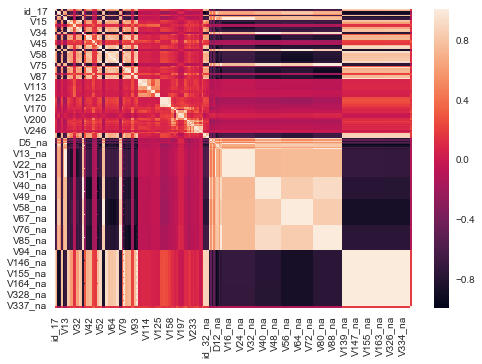

In [41]:
top_corr_features = correlation.index[abs(correlation['isFraud']) >= 0.10]
sns.heatmap(train_corr[top_corr_features].corr(), annot=False)